In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Add callback feature
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print('\n Reached 99% Accuracy so stopped Training !!')
            self.model.stop_training=True

In [3]:
# Show what images are in the dataset 
# And their array format/
# Get data from Mnist dataset 
path = 'mnist.npz'

In [4]:
# Load data into training and testing data
callbacks = myCallBack()
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data(path)
x_train, x_test = x_train / 255.0, x_test / 255.0 

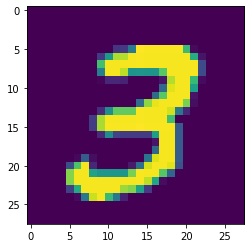

In [5]:
np.set_printoptions(linewidth=200)
plt.imshow(x_train[7])

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
# Fit the model

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1825 - accuracy: 0.9439
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0828 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0565 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0450 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0365 - accuracy: 0.9883
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0320 - accuracy: 0.9902
 Reached 99% Accuracy so stopped Training !!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0320 - accuracy: 0.9902


In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - ETA: 0s - loss: 0.1126 - accuracy: 0.97 - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9724


[0.11278461664915085, 0.9724000096321106]

In [9]:
classifications = model.predict(x_test)
print(classifications[7])

[2.24723044e-06 8.28890336e-07 3.04076784e-05 2.34220948e-04 1.04199906e-04 3.34263168e-05 2.29012054e-09 6.80012890e-05 3.61919992e-05 9.99490499e-01]


In [10]:
print(y_test[7])

9
